## **Business problem overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# **Data understanding and analysis**

In [97]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [98]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0.0,1.0,1.0,1.0,NaN,968.0,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.0,NaN,1.0,1.0,NaN,1006.0,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0.0,NaN,NaN,NaN,1.0,1103.0,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0.0,NaN,NaN,NaN,NaN,2491.0,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,0.0,NaN,NaN,NaN,1526.0,0.0,0.0,0.00,0.00


In [99]:
df.shape

(41071, 226)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41071 entries, 0 to 41070
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 70.8+ MB


In [101]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,4.107100e+04,41071.0,40652.0,40652.0,40652.0,41071.000000,41071.000000,41071.000000,41071.000000,39456.000000,...,41070.000000,10410.000000,10542.000000,10840.000000,10652.000000,41070.000000,41070.000000,41070.000000,41070.000000,41070.000000
mean,7.001202e+09,109.0,0.0,0.0,0.0,282.793882,277.387057,278.348051,261.239612,130.905604,...,0.087972,0.914890,0.909410,0.890129,0.860026,1219.214220,67.821084,66.317727,59.052772,3.357934
std,6.967133e+05,0.0,0.0,0.0,0.0,338.554667,350.271392,355.581841,360.888524,293.824865,...,0.703424,0.279059,0.287039,0.312743,0.346976,954.575699,257.357495,265.433654,245.977529,34.548957
min,7.000000e+09,109.0,0.0,0.0,0.0,-2041.228000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000598e+09,109.0,0.0,0.0,0.0,93.553500,88.054000,83.889000,62.838000,7.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001194e+09,109.0,0.0,0.0,0.0,198.278000,191.211000,191.346000,177.541000,34.440000,...,0.000000,1.000000,1.000000,1.000000,1.000000,862.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001809e+09,109.0,0.0,0.0,0.0,372.361500,365.228500,368.138000,352.500500,118.690000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1809.000000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,6504.340000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,6604.950000,7237.780000,7080.380000,2618.570000


## Handling missing values

#### Handling missing values in columns

In [102]:
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
arpu_3g_6,74.65
night_pck_user_6,74.65
total_rech_data_6,74.65
arpu_2g_6,74.65
max_rech_data_6,74.65
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [103]:
#Identify columns with more than 30% missing values
df_miss_30 = list(df_miss.index[df_miss['null'] > 30])


In [104]:
# Delete the columns having more than 30% missing values
df = df.drop(df_miss_30, axis=1)

In [105]:
df.shape

(41071, 186)

Removing unwanted columns

In [106]:
#Dropping circle_id column as this column is same for all the data and there will be no impact of this column on the data analysis.
df = df.drop('circle_id', axis=1)

In [107]:
# Dropping the date column as the dates does not provide a value add
date_col = [k for k in df.columns.to_list() if 'date' in k]
print(date_col) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [108]:
# Dropping date columns 
df = df.drop(date_col, axis=1)

In [109]:
df.shape

(41071, 177)

# **Data preparation**
The following data preparation steps are crucial for this problem:

**1. Filter high-value customers:**
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

**2. Tag churners and remove attributes of the churn phase:**
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

###1. Filter high-value customers

Identify the  70th percentile of the average recharge amount in the first two months (the good phase).

1. Create a column `avg_ra_6_7` by fidning the average recharge amount of first two months i.e.; 6 and 7. 

In [110]:
df['avg_ra_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

2. Identify the 70th percentile of the avg_ra_6_7 that is X

In [111]:
X = df['avg_ra_6_7'].quantile(0.7)
X

369.5

Filter the customers, who have recharged more than or equal to X.

In [112]:
df = df[df['avg_ra_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0.0,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0.0,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0


In [113]:
df.shape

(12326, 178)

After filtering the high-value customers, there are about 30k rows.

#### Handling missing values in rows

In [114]:
# Identify the rows with more than 50% missing values
df_miss_row_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_miss_row_50.shape

(41, 178)

In [115]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_miss_row_50.index)
df.shape

(12285, 178)

In [116]:
# Checking the missing values in columns again
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
loc_ic_mou_9,5.28
og_others_9,5.28
loc_og_t2t_mou_9,5.28
loc_ic_t2t_mou_9,5.28
loc_og_t2m_mou_9,5.28
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


From the above vaues, MOU for all the types of calls for the september (9) month have missing values.

Identify the missing values of the MOU for September (9) and delete the records for which MOU for Sep(9) are null.

In [117]:
# List the columns of MOU Sep(9)
print(((df_miss[df_miss['null'] == 5.32]).index).to_list())

[]


In [118]:
# Creating a dataframe where  MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0.0,0.0,0.0,0.0,502.0,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1.0,0.0,0.0,0.0,332.0,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0.0,0.0,0.0,0.0,264.0,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0.0,0.0,0.0,0.0,244.0,0.00,831.48,1223.04,0.0,492.0


In [119]:
df_null_mou_9.shape

(649, 178)

In [120]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [121]:
# Again Cheking percent of missing values in columns
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
og_others_6,0.58
loc_ic_mou_6,0.58
loc_og_mou_6,0.58
loc_ic_t2f_mou_6,0.58
std_og_t2f_mou_6,0.58
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


From the above vaues, MOU for all the types of calls for the August (8) month have missing values.

Identify the missing values of the MOU for August (8) and delete the records for which MOU for August (8) are null.

In [122]:
# Listing the columns of MOU Aug(8)
print(((df_miss[df_miss['null'] == 0.55]).index).to_list())

[]


In [123]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0.0,0.0,0.0,0.0,1102.0,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0.0,0.0,0.0,0.0,274.0,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0.0,0.0,0.0,0.0,936.0,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0.0,0.0,0.0,0.0,755.0,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0.0,0.0,0.0,0.0,520.0,0.0,0.0,0.0,0.0,421.0


In [124]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [125]:
# Again cheking percent of missing values in columns
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
roam_ic_mou_6,0.54
spl_og_mou_6,0.54
og_others_6,0.54
loc_ic_t2t_mou_6,0.54
loc_og_t2m_mou_6,0.54
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


From the above vaues, MOU for all the types of calls for the June 6 month have missing values.

Identify the missing values of the MOU for June 6 and delete the records for which MOU for June 6 are null.

In [126]:
# Listing the columns of MOU Jun(6)
print(((df_miss[df_miss['null'] == 0.44]).index).to_list())

[]


In [127]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0.0,0.0,0.0,0.0,1894.0,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0.0,0.0,1.0,0.0,424.0,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0.0,0.0,0.0,0.0,945.0,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0.0,0.0,2.0,1.0,490.0,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0.0,0.0,0.0,0.0,737.0,0.00,0.00,0.00,0.00,441.5


In [128]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [129]:
# Again cheking percent of missing values in columns
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
loc_ic_t2f_mou_7,0.11
isd_ic_mou_7,0.11
loc_og_t2f_mou_7,0.11
loc_og_t2c_mou_7,0.11
loc_og_mou_7,0.11
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


From the above vaues, MOU for all the types of calls for the July (7) month have missing values.

Identify the missing values of the MOU for July (7) and delete the records for which MOU for August (8) are null.

In [130]:
# Listing the columns of MOU Jul(7)
print(((df_miss[df_miss['null'] == 0.12]).index).to_list())

[]


In [131]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0.0,0.0,0.0,0.0,576.0,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0.0,0.0,0.0,0.0,672.0,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0.0,0.0,0.0,0.0,3107.0,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0.0,0.0,0.0,0.0,2664.0,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0.0,0.0,0.0,0.0,219.0,0.00,0.0,0.0,0.00,995.0


In [132]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [133]:
# Again cheking percent of missing values in columns
df_miss = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_miss

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


The missing values are not present the data anymore.

In [134]:
df.shape

(11499, 178)

## 2. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [135]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [136]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_ra_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.0,640.0,0


After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [137]:
# List the columns for churn month(9)
att_9 = [col for col in df.columns.to_list() if '_9' in col]
print(att_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [138]:
# Deleting the churn month columns
df = df.drop(att_9, axis=1)

In [139]:
# Dropping sep_vbc_3g column as september is an _9 attribute
df = df.drop('sep_vbc_3g', axis=1)

#### Churn rate percentage

In [140]:
round(100*(df['churn'].mean()),2)

3.47

The rate of churn is typically low (about 5-10%, this is called class-imbalance) - we will use techniques to handle class imbalance later.

## Datatype conversion

In the final dataset except mobile_number and churn columns all other columns are numeric types. Hence, converting mobile_number and churn datatypes to object.

In [141]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11499 entries, 8 to 41068
Columns: 136 entries, mobile_number to churn
dtypes: float64(134), object(2)
memory usage: 12.0+ MB


In [143]:
# Listing of only the numeric columns
numeric_col = df.select_dtypes(exclude=['object']).columns
print(numeric_col)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_ra_6_7'],
      dtype='object', length=134)


In [144]:
# Removal of outliers that is lying below 10th and above 90th percentile
for col in numeric_col: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(11374, 136)

### Derivation of new features

In [145]:
# Listing the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Derivation of new column `decrease_mou_action`
This column `decrease_mou_action` indicates whether the minutes of usage of the customer has decreased in the action phase when compared to the good phase.

In [146]:
# Total mou at good phase including incoming and outgoing
data['total_mou_good_phase'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [147]:
# Avg. mou at action phase
# Taking average as there are two months(7 and 8) included in action phase
data['avg_mou_action_phase'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [148]:
# Difference between avg_mou_good and avg_mou_action
data['diff_mou_good_action'] = data['avg_mou_action_phase'] - data['total_mou_good_phase']

In [149]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou_good_action'] < 0), 1, 0)

In [150]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_ra_6_7,churn,total_mou_good_phase,avg_mou_action_phase,diff_mou_good_action,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315.0,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607.0,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511.0,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667.0,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720.0,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [151]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [152]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [153]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [154]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_ra_6_7,churn,total_mou_good_phase,avg_mou_action_phase,diff_mou_good_action,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [155]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [156]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [157]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [158]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good_phase,avg_mou_action_phase,diff_mou_good_action,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [159]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [160]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [161]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [162]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [163]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [164]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [165]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [166]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## EDA

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [167]:
# Converting churn column to int in order to do an aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

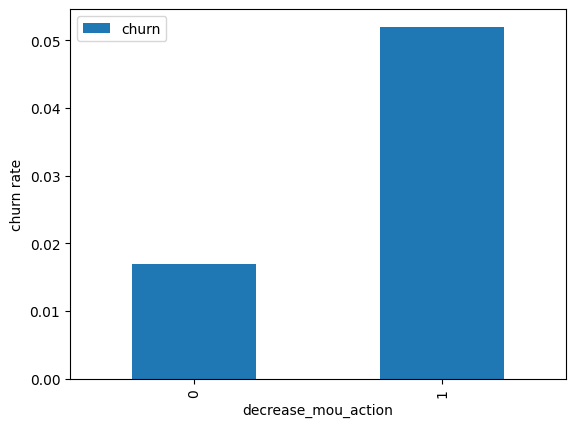

In [168]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

From the above table, the churn rate is more for the customers, whose minutes of usage(mou) is decreased in the action phase when compared to the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

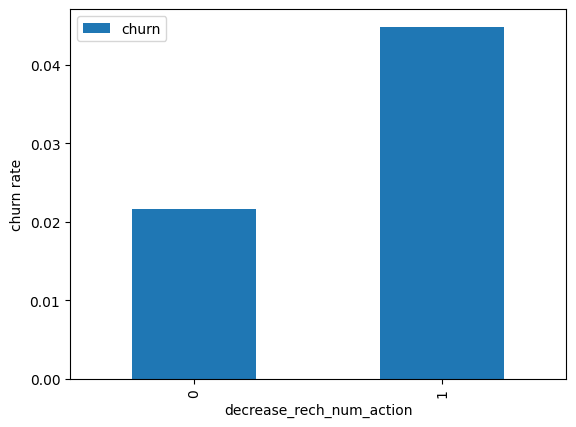

In [169]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

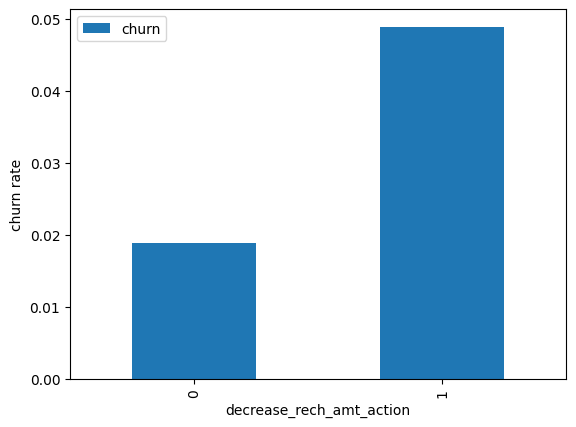

In [170]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

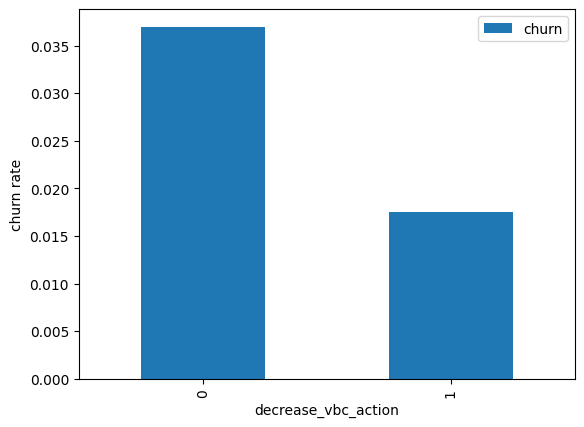

In [171]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [172]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

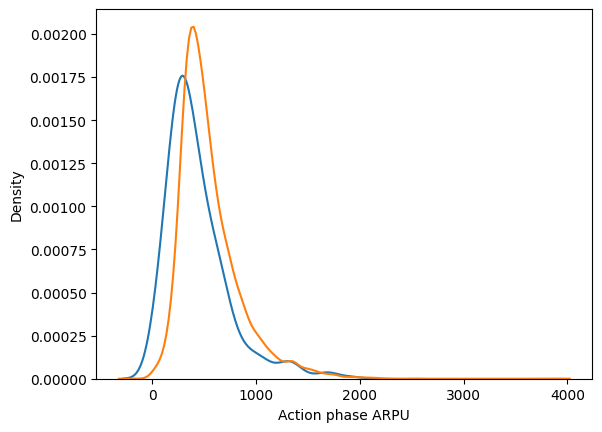

In [173]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

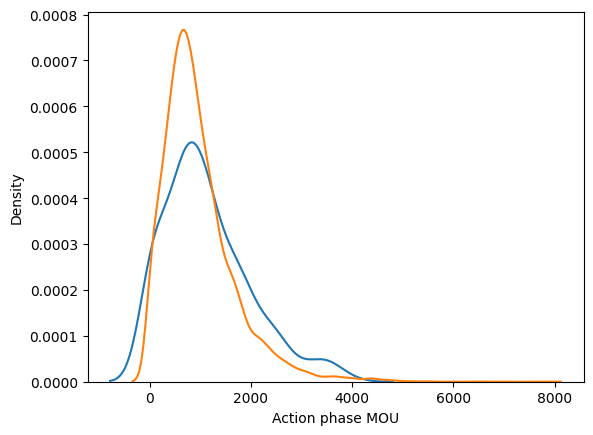

In [174]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good_phase'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good_phase'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

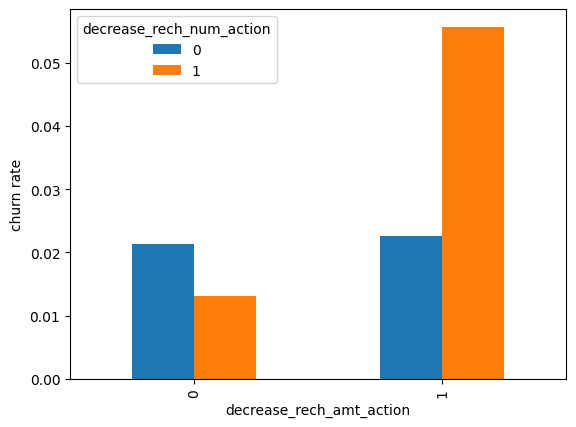

In [175]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

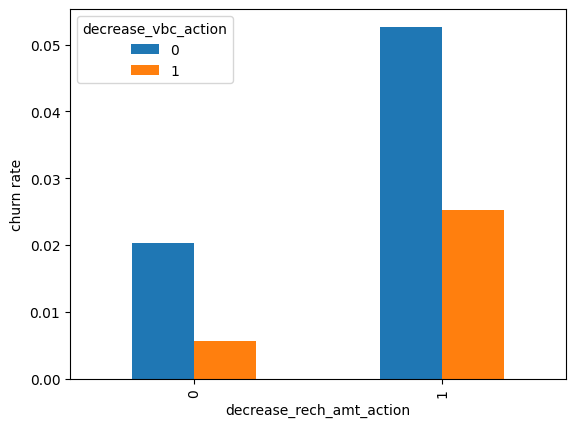

In [176]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Dropping few derived columns, which are not required in further analysis

In [177]:
data = data.drop(['total_mou_good_phase','avg_mou_action_phase','diff_mou_good_action','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_ra_6_7'], axis=1)

## Train-Test Split

In [178]:
# Import library
from sklearn.model_selection import train_test_split

In [179]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [180]:
# Putting target variable to y
y = data['churn']

In [181]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance


As seen before, The rate of churn is typically low 3.39 (about 5-10%, this is called class-imbalance) - we will use SMOTE(Synthetic Minority Oversampling Technique) to handle class imbalance.

Therefore, creating synthetic samples by doing upsampling 

In [182]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [183]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [184]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [185]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [186]:
# Instantiate the Scaler
scaler = StandardScaler()

In [187]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [188]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [189]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-0.933640,-0.661711,-0.045310,-0.512809,-0.540620,-0.434879,-0.884325,...,2.289634,-0.854960,-0.260900,-0.265460,-0.262100,0,0,0,0,0
1,0.0,0.0,0.0,-0.229817,-0.792111,0.187802,0.599300,0.071316,1.404925,-0.556261,...,-0.132182,-0.960664,-0.260900,-0.265460,-0.262100,1,1,1,1,0
2,0.0,0.0,0.0,-0.413959,-0.843103,0.074800,-0.369970,0.464475,0.522522,-0.786349,...,1.078726,0.658586,-0.260900,0.507152,-0.224411,0,1,0,1,0
3,0.0,0.0,0.0,-0.731617,-0.422782,-0.186364,-0.500926,-0.147418,-0.352841,-0.221852,...,1.078726,-0.609866,1.773415,2.913958,1.900585,0,0,0,0,0
4,0.0,0.0,0.0,0.401196,1.670263,0.018714,-0.641303,-0.395591,-0.381956,0.979756,...,-0.132182,-0.081344,-0.081739,0.997751,-0.262100,1,1,0,0,0


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [190]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
26725,0.0,0.0,0.0,-0.545826,0.217685,0.363707,-0.404820,0.538397,-0.217025,0.030250,...,-0.132182,-0.750417,-0.2609,-0.265460,-0.262100,0,0,0,0,0
21995,0.0,0.0,0.0,-0.797708,-0.698808,0.236038,-0.099692,-0.008341,0.472314,-0.560832,...,-0.132182,-0.278814,-0.2609,-0.265460,-0.262100,0,0,0,0,0
22409,0.0,0.0,0.0,0.330368,0.527453,0.615620,-0.659793,-0.557223,-0.344193,0.145018,...,-0.132182,0.047592,-0.2609,-0.265460,-0.262100,0,1,1,1,0
30437,0.0,0.0,0.0,-0.387351,-0.792279,-0.535204,0.179362,0.197903,0.072483,0.088705,...,-0.132182,-0.936271,-0.2609,-0.265460,-0.262100,1,1,1,1,0
13929,0.0,0.0,0.0,1.148617,-0.463365,0.781518,-0.502783,-0.479730,0.091038,0.421258,...,-0.132182,2.932970,-0.2609,1.227143,2.866174,0,1,1,1,1


# Model with PCA

In [191]:
#Import PCA
from sklearn.decomposition import PCA

In [192]:
# Instantiate PCA
pca = PCA(random_state=42)

In [193]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [194]:
# Principal components
pca.components_

array([[ 4.96786996e-19, -2.22044605e-16, -1.11022302e-16, ...,
        -2.61341488e-02, -2.87583955e-02,  1.40224327e-02],
       [-5.79093934e-19,  1.66533454e-16,  5.55111512e-17, ...,
        -1.57529657e-02, -1.31232219e-02, -1.31736827e-02],
       [-5.96088427e-19, -2.77555756e-17,  1.38777878e-16, ...,
        -5.23958938e-02, -5.05576286e-02,  2.14470247e-02],
       ...,
       [-0.00000000e+00, -3.69027522e-02, -1.56555351e-02, ...,
        -2.00577402e-17, -2.16840434e-18,  6.76067817e-17],
       [ 0.00000000e+00, -3.29948407e-02, -4.45316377e-02, ...,
        -6.02816408e-17,  4.34765071e-17, -7.90925485e-17],
       [ 9.99991794e-01, -3.50977834e-03,  2.01515301e-03, ...,
         4.85180472e-18,  3.65918233e-18,  7.05409038e-18]])

In [195]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11124107 0.18995656 0.24373416 0.2875657  0.32754943 0.36647944
 0.40323977 0.43259792 0.45830942 0.4835956  0.50731866 0.52970371
 0.55046394 0.57069421 0.58876591 0.60599323 0.62268703 0.63843354
 0.65346787 0.66728439 0.680258   0.69248083 0.70388324 0.71466056
 0.72472168 0.73423257 0.7437138  0.75282119 0.76156793 0.77010558
 0.77853205 0.78650214 0.79435618 0.80206841 0.8093443  0.81622849
 0.82289249 0.82947187 0.8359472  0.84236352 0.84845307 0.85444915
 0.86028177 0.86584333 0.87114414 0.87628467 0.88116362 0.88600384
 0.89044961 0.8948623  0.89915696 0.90328677 0.90719751 0.91084682
 0.9144066  0.91790448 0.92134483 0.92470249 0.92795947 0.93109992
 0.93412778 0.93693671 0.93970384 0.94239863 0.94505787 0.9476636
 0.95017235 0.95264841 0.95504865 0.95735247 0.9595505  0.96170411
 0.96370663 0.96569608 0.96763235 0.96950969 0.97136348 0.97313979
 0.97487626 0.97658119 0.97823531 0.97982149 0.9813309  0.98276118
 0.98415707 0.98547581 0.98676046 0.98802969 0.98923413 0.99040

Text(0, 0.5, 'Cumulative Variance')

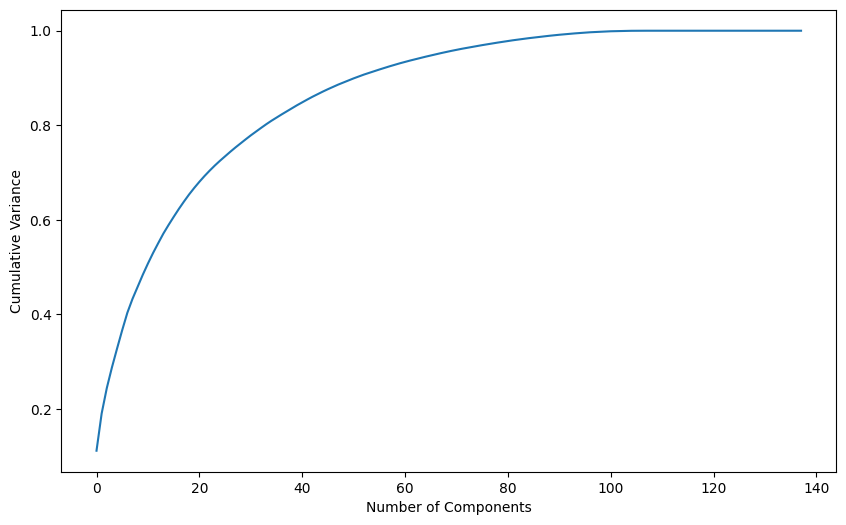

In [196]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [197]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [198]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [199]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [200]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [201]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [202]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [203]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [204]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [205]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.226714,0.077082,0.009084,0.004132,0.01,{'C': 0.01},0.881261,0.893287,0.888573,0.889955,...,0.888226,0.003931,6,0.887826,0.891493,0.895943,0.891187,0.887676,0.890825,0.003023
1,0.501769,0.156523,0.014205,0.007855,0.1,{'C': 0.1},0.881261,0.896730,0.889142,0.886569,...,0.888351,0.004987,5,0.888540,0.890356,0.896370,0.890473,0.888526,0.890853,0.002884
2,0.346523,0.079213,0.007988,0.002994,1,{'C': 1},0.881823,0.895009,0.893121,0.889391,...,0.889595,0.004541,4,0.890395,0.891493,0.897224,0.891900,0.889803,0.892163,0.002639
3,0.195067,0.007501,0.004427,0.000034,10,{'C': 10},0.883512,0.893287,0.894827,0.892777,...,0.890607,0.004097,3,0.891394,0.892487,0.896797,0.894467,0.890228,0.893075,0.002327
4,0.199887,0.011682,0.004413,0.000093,100,{'C': 100},0.883512,0.895009,0.894258,0.894470,...,0.891407,0.004369,2,0.891680,0.892203,0.897224,0.894324,0.890796,0.893245,0.002304
5,0.197324,0.011052,0.004362,0.000051,1000,{'C': 1000},0.882949,0.894435,0.894827,0.894470,...,0.891409,0.004536,1,0.891680,0.892203,0.896940,0.894467,0.890228,0.893103,0.002353


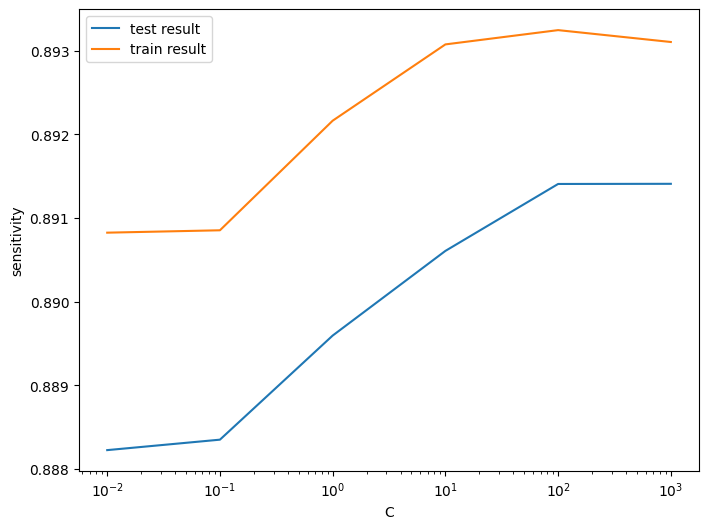

In [206]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [207]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8914086671832463 at C = 1000


#### Logistic regression with optimal C

In [208]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [209]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [210]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [211]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7384 1400]
 [ 933 7851]]


In [212]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [213]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8672017304189436
Sensitivity:- 0.8937841530054644
Specificity:- 0.8406193078324226


##### Prediction on the test set

In [214]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [215]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1837  359]
 [  14   65]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [217]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8360439560439561
Sensitivity:- 0.8227848101265823
Specificity:- 0.8365209471766849


***Model summary***

- Train set

Accuracy:- 0.87

Sensitivity:- 0.89

Specificity:- 0.84


- Test set

Accuracy:- 0.84

Sensitivity:- 0.82

Specificity:- 0.84

    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA

In [218]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [219]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [220]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.580857,0.268609,1.615608,0.015651,1,0.01,"{'C': 1, 'gamma': 0.01}",0.942964,0.943648,0.944331,0.943648,0.000558,6,0.952100,0.948600,0.949112,0.949937,0.001544
1,5.604819,0.594315,2.535705,0.230537,1,0.001,"{'C': 1, 'gamma': 0.001}",0.878586,0.882343,0.882001,0.880977,0.001696,10,0.885075,0.883624,0.884563,0.884421,0.000601
2,9.536946,1.670706,4.665914,1.330518,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.855704,0.856899,0.857582,0.856728,0.000776,12,0.860314,0.857582,0.856130,0.858009,0.001734
3,3.012167,0.652249,1.049329,0.115696,10,0.01,"{'C': 10, 'gamma': 0.01}",0.971653,0.973019,0.969775,0.971482,0.001330,3,0.981557,0.982155,0.983009,0.982240,0.000596
4,4.382728,0.390493,2.476873,1.007169,10,0.001,"{'C': 10, 'gamma': 0.001}",0.909836,0.916837,0.917520,0.914731,0.003473,7,0.920936,0.916923,0.918204,0.918687,0.001674
5,4.483803,0.181112,2.624030,0.309485,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.869706,0.870731,0.870731,0.870389,0.000483,11,0.872780,0.871158,0.872609,0.872182,0.000728
6,2.984245,0.155010,0.798843,0.289078,100,0.01,"{'C': 100, 'gamma': 0.01}",0.981728,0.979167,0.979337,0.980077,0.001169,1,0.995133,0.994792,0.994962,0.994962,0.000139
7,4.618523,0.591375,1.501222,0.262516,100,0.001,"{'C': 100, 'gamma': 0.001}",0.941428,0.945014,0.945697,0.944046,0.001872,5,0.954064,0.951161,0.952015,0.952413,0.001218
8,4.947090,0.370948,4.413688,1.811957,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.877391,0.883538,0.883538,0.881489,0.002898,9,0.887466,0.884990,0.887380,0.886612,0.001148
9,4.098395,0.187467,0.636937,0.210146,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.981557,0.977459,0.975751,0.978256,0.002436,2,0.999573,0.999488,0.999744,0.999602,0.000106


##### Plotting the accuracy with various C and gamma values

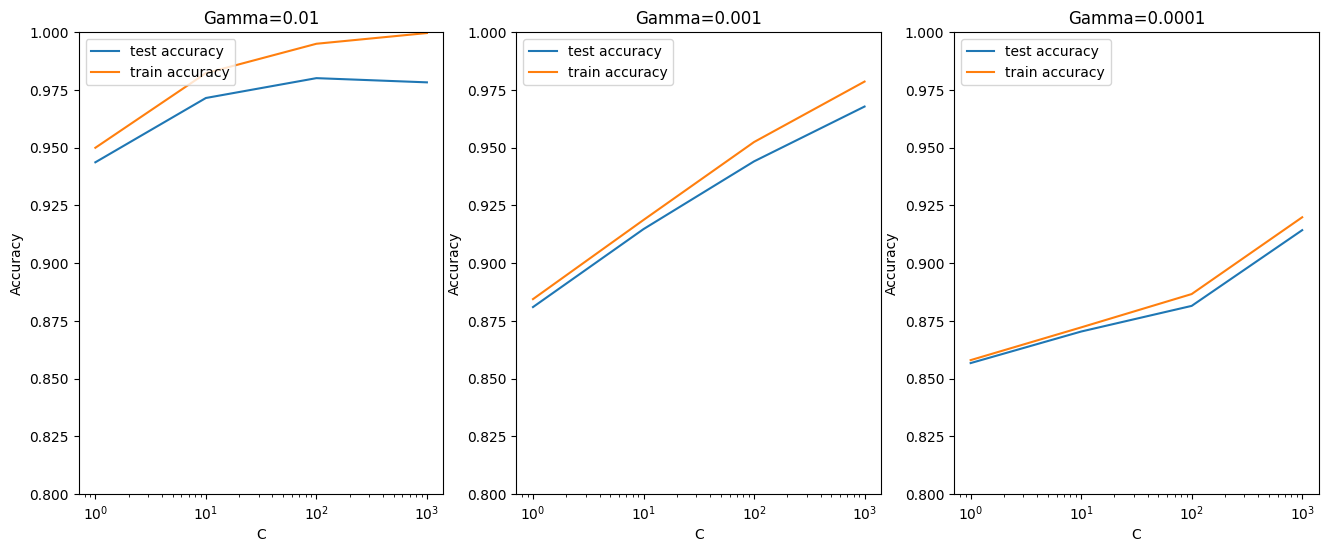

In [221]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [222]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9800774134790529 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

##### Build the model with optimal hyperparameters

In [223]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [224]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [225]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7615 1169]
 [ 763 8021]]


In [226]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [227]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8900273224043715
Sensitivity:- 0.9131375227686703
Specificity:- 0.8669171220400729


##### Prediction on the test set

In [228]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [229]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1892  304]
 [  17   62]]


In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8589010989010989
Sensitivity:- 0.7848101265822784
Specificity:- 0.8615664845173042


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.91
    - Specificity = 0.87
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.78
    - Specificity = 0.86

## Decision tree with PCA

In [232]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [233]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [234]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.663548,0.076857,0.004857,0.001036,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.858850,0.876494,0.874217,0.870729,0.879340,0.871926,0.007120,3
1,0.709348,0.092340,0.005048,0.000721,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.858850,0.876494,0.874217,0.870729,0.879340,0.871926,0.007120,3
2,0.597425,0.004119,0.003892,0.000233,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.860558,0.863404,0.877063,0.870159,0.866818,0.867600,0.005726,7
3,0.597864,0.002397,0.004137,0.000697,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.860558,0.863404,0.877063,0.870159,0.866818,0.867600,0.005726,7
4,1.073289,0.131754,0.004759,0.000796,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.895845,0.913489,0.902675,0.900911,0.903244,0.903233,0.005753,2
5,0.935052,0.015469,0.003861,0.000161,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.895845,0.913489,0.903813,0.900911,0.903244,0.903461,0.005749,1
6,0.851289,0.015614,0.003862,0.000157,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.854866,0.850882,0.880478,0.886674,0.873079,0.869196,0.014061,5
7,1.000272,0.139230,0.005237,0.000999,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.854866,0.850882,0.880478,0.884966,0.873079,0.868854,0.013647,6


In [235]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9034605476564292
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


##### Model with optimal hyperparameters

In [236]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [237]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [238]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7864  920]
 [ 656 8128]]


In [239]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [240]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9102914389799636
Sensitivity:- 0.9253187613843351
Specificity:- 0.895264116575592


##### Prediction on the test set

In [241]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [242]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1893  303]
 [  22   57]]


In [243]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [244]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8571428571428571
Sensitivity:- 0.7215189873417721
Specificity:- 0.8620218579234973


***Model summary***

- Train set
    - Accuracy = 0.91
    - Sensitivity = 0.92
    - Specificity = 0.89
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.72
    - Specificity = 0.86
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random forest with PCA

In [245]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [246]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [247]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8692509107468124 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


##### Model with optimal hyperparameters

In [248]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [249]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [250]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [251]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7555 1229]
 [ 945 7839]]


In [252]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [253]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.876252276867031
Sensitivity:- 0.8924180327868853
Specificity:- 0.8600865209471766


##### Prediction on the test set

In [254]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [255]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1865  331]
 [  21   58]]


In [256]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [257]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8452747252747252
Sensitivity:- 0.7341772151898734
Specificity:- 0.849271402550091


***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.89
    - Specificity = 0.86
- Test set
    - Accuracy = 0.84
    - Sensitivity = 0.73
    - Specificity = 0.85
    
    
We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA
After trying several models we can see that for achieving the best sensitivity which was our ultimate goal  the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx. 90%. Also we have good accuracy of approx. 88%.

# Without PCA

## Logistic regression with No PCA

In [258]:
##### Importing stats model
import statsmodels.api as sm

In [259]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [260]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [261]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17568
Model:                            GLM   Df Residuals:                    17438
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 May 2023   Deviance:                       9365.9
Time:                        13:18:56   Pearson chi2:                 1.26e+09
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -23.5276   1.02e+04     -0.002      0.998      -2e+04    1.99e+04
loc_og_t2o_mou               -4e-07      0.000     -0.004      0.997      -0.000       0.000
std_og_t2o_mou             4.63e-07      0.000      0.002      0.998      -0.000       0.000
loc_ic_t2o_mou            1.527e-09      0.000   9.72e-06      1.000      -0.000       0.000
arpu_6                       0.3362      0.124      2.721      0.007       0.094       0.578
arpu_7                       0.6923      0.164      4.213      0.000       0.370       1.014
arpu_8                       0.4214      0.180      2.347      0.019       0.069       0.773
onnet_mou_6                 20.2826      7.506      2.702      0.007       5.571      34.995
onnet_mou_7                 -5.5230      2.672     -2.067      0.039     -10.761      -0.285
onnet_mou_8                  2.5219      4.192      0.602      0.547      -5.694      10.738
offnet_mou_6                21.4247      7.188      2.981      0.003       7.337      35.512
offnet_mou_7                -5.3099      2.791     -1.903      0.057     -10.780       0.160
offnet_mou_8                 0.1915      4.153      0.046      0.963      -7.949       8.332
roam_ic_mou_6               -0.0395      0.062     -0.642      0.521      -0.160       0.081
roam_ic_mou_7               -0.1277      0.087     -1.476      0.140      -0.297       0.042
roam_ic_mou_8                0.6634      0.082      8.046      0.000       0.502       0.825
roam_og_mou_6               -7.2173      2.528     -2.855      0.004     -12.172      -2.263
roam_og_mou_7                1.9249      0.832      2.313      0.021       0.294       3.556
roam_og_mou_8                0.0047      1.304      0.004      0.997      -2.551       2.560
loc_og_t2t_mou_6         -5529.5259   1087.776     -5.083      0.000   -7661.528   -3397.524
loc_og_t2t_mou_7          -316.9403   1084.583     -0.292      0.770   -2442.683    1808.803
loc_og_t2t_mou_8          7800.9362   1004.102      7.769      0.000    5832.932    9768.941
loc_og_t2m_mou_6         -5680.5227   1117.300     -5.084      0.000   -7870.390   -3490.655
loc_og_t2m_mou_7          -320.8311   1093.723     -0.293      0.769   -2464.490    1822.827
loc_og_t2m_mou_8          9160.3736   1178.945      7.770      0.000    6849.683    1.15e+04
loc_og_t2f_mou_6          -420.8456     82.838     -5.080      0.000    -583.205    -258.486
loc_og_t2f_mou_7           -24.1360     80.797     -0.299      0.765    -182.494     134.222
loc_og_t2f_mou_8           627.8966     80.854      7.766      0.000     469.425     786.368
loc_og_t2c_mou_6            -0.0431      0.048     -0.906      0.365      -0.136       0.050
loc_og_t2c_mou_7             0.0288      0.048      0.599      0.549      -0.065       0.123
loc_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [262]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [263]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [264]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8',
       'isd_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


**Model Building**


### Model-1 with RFE selected columns

In [265]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17568
Model:                            GLM   Df Residuals:                    17552
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 May 2023   Deviance:                       12230.
Time:                        13:19:43   Pearson chi2:                 9.86e+11
No. Iterations:                    31   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -8.3463   5040.711     -0.002      0.999   -9887.959    9871.266
arpu_7                  1.3357      0.095     14.122      0.000       1.150       1.521
roam_og_mou_8           1.0652      0.046     23.324      0.000       0.976       1.155
loc_og_t2m_mou_7       -1.1247      0.056    -20.111      0.000      -1.234      -1.015
loc_og_t2f_mou_8       -1.1688      0.128     -9.136      0.000      -1.420      -0.918
isd_og_mou_8           -1.2021      0.296     -4.064      0.000      -1.782      -0.622
og_others_8          -365.2955   2.51e+05     -0.001      0.999   -4.92e+05    4.91e+05
loc_ic_t2t_mou_8       -0.9834      0.105     -9.364      0.000      -1.189      -0.778
loc_ic_t2f_mou_8       -1.6053      0.157    -10.257      0.000      -1.912      -1.299
total_ic_mou_8         -0.7460      0.078     -9.585      0.000      -0.899      -0.593
ic_others_8            -0.9607      0.163     -5.901      0.000      -1.280      -0.642
total_rech_num_8       -0.7739      0.030    -25.409      0.000      -0.834      -0.714
total_rech_amt_7       -0.9145      0.093     -9.883      0.000      -1.096      -0.733
last_day_rch_amt_8     -0.9127      0.036    -25.329      0.000      -0.983      -0.842
monthly_3g_8           -0.9145      0.067    -13.596      0.000      -1.046      -0.783
decrease_vbc_action    -2.1397      0.130    -16.452      0.000      -2.395      -1.885
=======================================================================================
"""

#### Checking VIFs

In [266]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,8.34
11,total_rech_amt_7,8.21
8,total_ic_mou_8,2.20
6,loc_ic_t2t_mou_8,1.61
2,loc_og_t2m_mou_7,1.34
7,loc_ic_t2f_mou_8,1.24
12,last_day_rch_amt_8,1.21
3,loc_og_t2f_mou_8,1.19
1,roam_og_mou_8,1.16
10,total_rech_num_8,1.14


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 1

In [270]:
# Removing monthly_2g_7 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_7', 'roam_og_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_7', 'last_day_rch_amt_8', 'monthly_3g_8', 'decrease_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [271]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17568
Model:                            GLM   Df Residuals:                    17553
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6126.4
Date:                Sun, 07 May 2023   Deviance:                       12253.
Time:                        13:46:41   Pearson chi2:                 1.10e+12
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4978
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0086      0.049    -20.772      0.000      -1.104      -0.913
arpu_7                  1.3329      0.095     14.101      0.000       1.148       1.518
roam_og_mou_8           1.0700      0.046     23.404      0.000       0.980       1.160
loc_og_t2m_mou_7       -1.1228      0.056    -20.086      0.000      -1.232      -1.013
loc_og_t2f_mou_8       -1.1648      0.128     -9.125      0.000      -1.415      -0.915
isd_og_mou_8           -1.2250      0.297     -4.130      0.000      -1.806      -0.644
loc_ic_t2t_mou_8       -0.9783      0.105     -9.321      0.000      -1.184      -0.773
loc_ic_t2f_mou_8       -1.6015      0.156    -10.238      0.000      -1.908      -1.295
total_ic_mou_8         -0.7489      0.078     -9.619      0.000      -0.902      -0.596
ic_others_8            -0.9628      0.163     -5.911      0.000      -1.282      -0.644
total_rech_num_8       -0.7777      0.030    -25.544      0.000      -0.837      -0.718
total_rech_amt_7       -0.9133      0.092     -9.875      0.000      -1.095      -0.732
last_day_rch_amt_8     -0.9144      0.036    -25.405      0.000      -0.985      -0.844
monthly_3g_8           -0.9143      0.067    -13.596      0.000      -1.046      -0.782
decrease_vbc_action    -2.1403      0.130    -16.464      0.000      -2.395      -1.885
=======================================================================================
"""

#### Checking VIF for Model-2

In [273]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,8.34
10,total_rech_amt_7,8.21
7,total_ic_mou_8,2.20
5,loc_ic_t2t_mou_8,1.61
2,loc_og_t2m_mou_7,1.34
6,loc_ic_t2f_mou_8,1.24
11,last_day_rch_amt_8,1.21
3,loc_og_t2f_mou_8,1.19
1,roam_og_mou_8,1.16
9,total_rech_num_8,1.14


As we can see from the model summary that all the variables p-values are significant and arpu_7 column has the highest VIF 8.34. Hence, deleting arpu_7 column.

In [274]:
# Removing total_ic_mou_8 column
log_cols.remove('arpu_7')

### Model-3
Model after removing arpu_7 column.

In [275]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                17568
Model:                            GLM   Df Residuals:                    17554
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6236.3
Date:                Sun, 07 May 2023   Deviance:                       12473.
Time:                        13:48:40   Pearson chi2:                 9.21e+11
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4915
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0103      0.049    -20.713      0.000      -1.106      -0.915
roam_og_mou_8           1.0562      0.046     22.804      0.000       0.965       1.147
loc_og_t2m_mou_7       -1.0386      0.054    -19.087      0.000      -1.145      -0.932
loc_og_t2f_mou_8       -1.1635      0.127     -9.176      0.000      -1.412      -0.915
isd_og_mou_8           -1.0593      0.311     -3.406      0.001      -1.669      -0.450
loc_ic_t2t_mou_8       -1.0243      0.106     -9.636      0.000      -1.233      -0.816
loc_ic_t2f_mou_8       -1.6551      0.160    -10.313      0.000      -1.970      -1.341
total_ic_mou_8         -0.8194      0.080    -10.254      0.000      -0.976      -0.663
ic_others_8            -1.0628      0.165     -6.434      0.000      -1.387      -0.739
total_rech_num_8       -0.7187      0.030    -24.231      0.000      -0.777      -0.661
total_rech_amt_7        0.3244      0.028     11.660      0.000       0.270       0.379
last_day_rch_amt_8     -0.8007      0.037    -21.863      0.000      -0.872      -0.729
monthly_3g_8           -0.8891      0.066    -13.393      0.000      -1.019      -0.759
decrease_vbc_action    -2.0162      0.126    -16.009      0.000      -2.263      -1.769
=======================================================================================
"""

#### VIF Model-3

In [276]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_8,2.20
4,loc_ic_t2t_mou_8,1.60
1,loc_og_t2m_mou_7,1.34
9,total_rech_amt_7,1.25
5,loc_ic_t2f_mou_8,1.24
10,last_day_rch_amt_8,1.20
2,loc_og_t2f_mou_8,1.19
0,roam_og_mou_8,1.16
8,total_rech_num_8,1.12
11,monthly_3g_8,1.10


From the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that *Model-3 log_no_pca_3 will be the final model*.

###  Model performance on the train set

In [279]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.000017
1    0.411235
2    0.353932
3    0.109886
4    0.500956
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [280]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.000017,0
1,0,0.411235,1
2,0,0.353932,2
3,0,0.109886,3
4,0,0.500956,4


##### Finding Optimal Probability Cutoff Point

In [281]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000017,0,1,0,0,0,0,0,0,0,0,0
1,0,0.411235,1,1,1,1,1,1,0,0,0,0,0
2,0,0.353932,2,1,1,1,1,0,0,0,0,0,0
3,0,0.109886,3,1,1,0,0,0,0,0,0,0,0
4,0,0.500956,4,1,1,1,1,1,1,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [282]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.758197     0.983037     0.533356
0.2          0.2  0.794968     0.961066     0.628871
0.3          0.3  0.820412     0.943648     0.697177
0.4          0.4  0.839936     0.925091     0.754781
0.5          0.5  0.851605     0.892646     0.810565
0.6          0.6  0.857411     0.849727     0.865096
0.7          0.7  0.850581     0.788593     0.912568
0.8          0.8  0.813240     0.676230     0.950250
0.9          0.9  0.613730     0.244991     0.982468


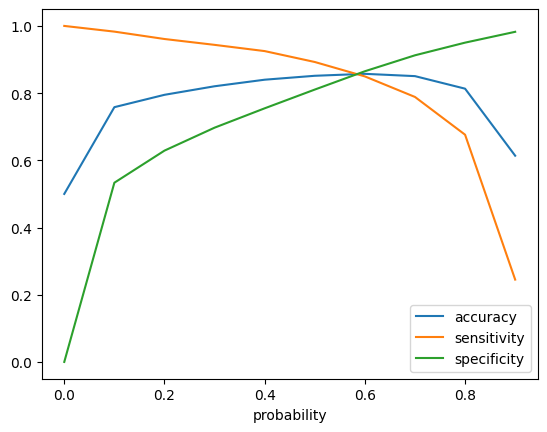

In [283]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probability.

Specificity - Increases with the increasing probability.

At point 0.6 where the three parameters cut each other, we can see that there is a balance between sensitivity and specificity with a good accuracy.

Here we are intended to achieve better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for achieving higher sensitivity, which is our main goal.

In [284]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.000017,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.411235,1,1,1,1,1,1,0,0,0,0,0,0
2,0,0.353932,2,1,1,1,1,0,0,0,0,0,0,0
3,0,0.109886,3,1,1,0,0,0,0,0,0,0,0,0
4,0,0.500956,4,1,1,1,1,1,1,0,0,0,0,1


##### Metrics

In [285]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[7120 1664]
 [ 943 7841]]


In [287]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [288]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8516051912568307
Sensitivity:- 0.8926457194899818
Specificity:- 0.8105646630236795


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [289]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

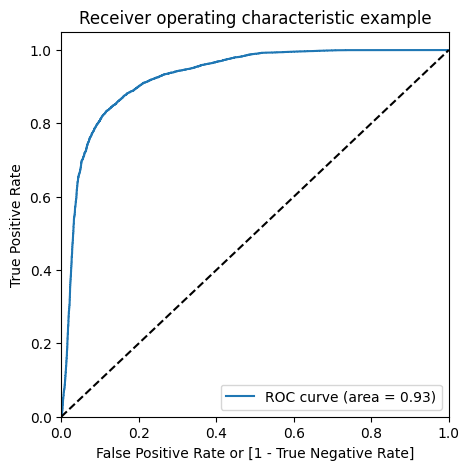

In [290]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [291]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [292]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [293]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [296]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [297]:
y_test_pred.head()

26725    1.824814e-01
21995    3.846342e-04
22409    4.951614e-03
30437    6.065419e-01
13929    1.679977e-08
dtype: float64

In [298]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
26725,1.824814e-01
21995,3.846342e-04
22409,4.951614e-03
30437,6.065419e-01
13929,1.679977e-08


In [299]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
26725,0
21995,0
22409,0
30437,0
13929,0


In [300]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [301]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [302]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [303]:
y_test_pred_final.head()

,churn,CustID,0
0,0,26725,1.824814e-01
1,0,21995,3.846342e-04
2,0,22409,4.951614e-03
3,0,30437,6.065419e-01
4,0,13929,1.679977e-08


In [304]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [305]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [306]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,26725,0,1.824814e-01
1,21995,0,3.846342e-04
2,22409,0,4.951614e-03
3,30437,0,6.065419e-01
4,13929,0,1.679977e-08


In [307]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [308]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,26725,0,1.824814e-01,0
1,21995,0,3.846342e-04,0
2,22409,0,4.951614e-03,0
3,30437,0,6.065419e-01,1
4,13929,0,1.679977e-08,0


##### Metrics

In [309]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[1801  395]
 [  13   66]]


In [310]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [311]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8206593406593407
Sensitivity:- 0.8354430379746836
Specificity:- 0.8201275045537341


***Model summary***

- Train set
    - Accuracy = 0.85
    - Sensitivity = 0.89
    - Specificity = 0.81
- Test set
    - Accuracy = 0.82
    - Sensitivity = 0.83
    - Specificity = 0.82
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it explains the important predictor variables as well as the significance of each variable. The model also helps us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recommendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

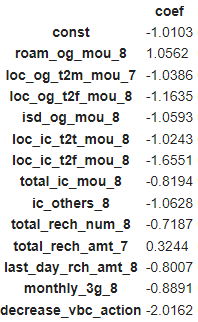

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probability.

E.g.:- 

If the total incoming minutes of usage (total_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Customers having decreasing local incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
5. Customers decreasing monthly 3g usage for August are most probable to churn.
6. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
7. roam_og_mou_8 variables have positive coefficients (2.1247). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

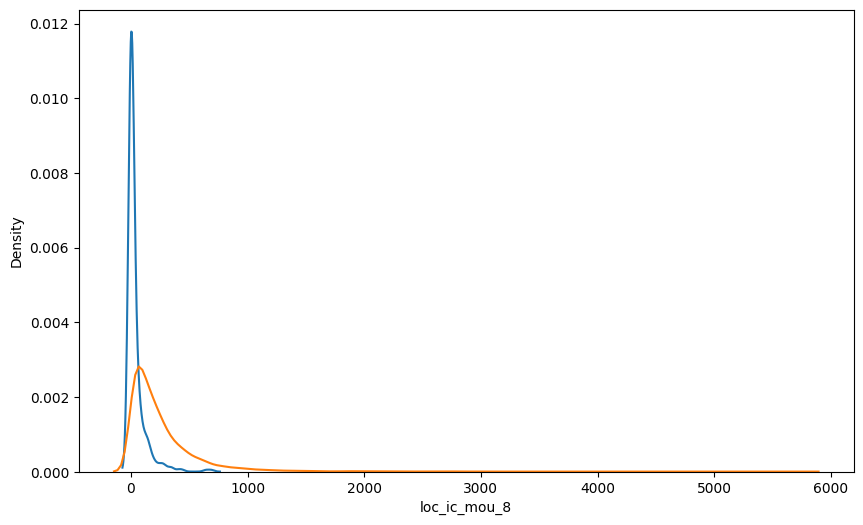

In [312]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

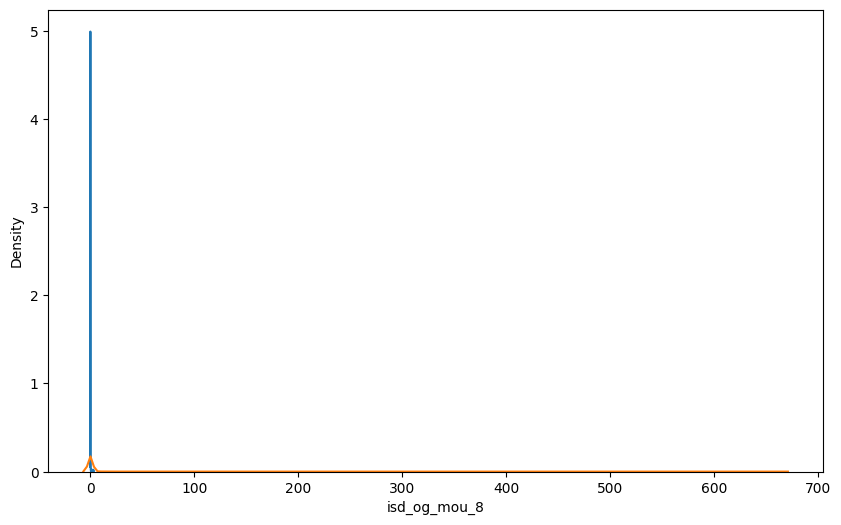

In [313]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.